## Notebook 2 in the simulation series

CHB, February 2026

We assume we have obtained the correct beam and receiver gain. Our analysis hinges critically on the rotation averaged beam. Here, we inspect this object.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from pygdsm import GlobalSkyModel16

%matplotlib widget

In [2]:
d = np.load("data_models.npz")

data = d["data"]
mask = d["mask"]
times = d["times"]
freqs = d["freqs"]  # MHz
beam_alm = d["beam_alm"]  # beam alm model
beam_hp = d["beam_hp"]  # healpix map of the alm model
g_rx = d["g_rx"]  # receiver gain (mean of beam factored out)
tx_flux = d["tx_flux"]

azalts = np.load("../sim_v003.npz")["azalts"]
az, alt = azalts.T

altcut = alt <= np.pi
az = az[altcut]
alt = alt[altcut]

In [3]:
def get_rot(alt, az):
    """
    Helper function to get healpy Rotator object for rotation of `alt' around X-axis then `az' around new Z-axis.
    """
    eul = (az, -alt, 0)  # XXX is this right?
    r = hp.Rotator(rot=eul, eulertype="X", deg=False, inv=False)
    return r

In [4]:
avg_beam = np.zeros((len(alt), *beam_alm.shape), dtype=complex)
for i in range(len(alt)):
    r = get_rot(alt[i], az[i])
    rb = [r.rotate_alm(a) for a in beam_alm]
    avg_beam[i] = rb

avg_beam = np.sum(avg_beam * np.sin(alt)[:, None, None], axis=0) / np.sum(np.sin(alt))

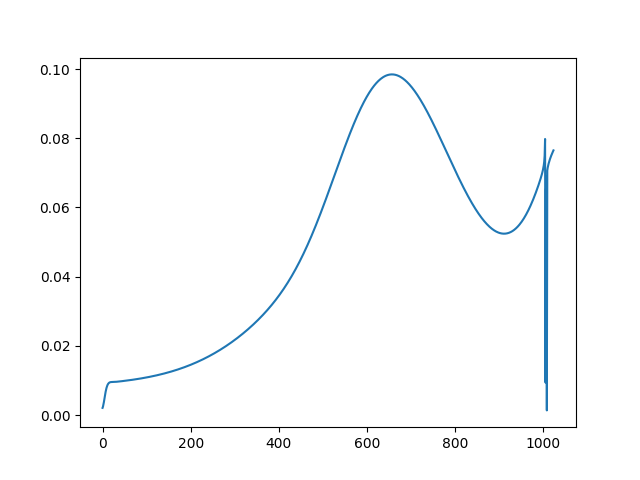

In [5]:
# anisotropies

an = np.zeros(len(avg_beam))
for i, m in enumerate(avg_beam):
    an[i] = np.sum(np.abs(m[1:])**2) / np.abs(m[0])**2

plt.figure()
plt.plot(an)
plt.show()

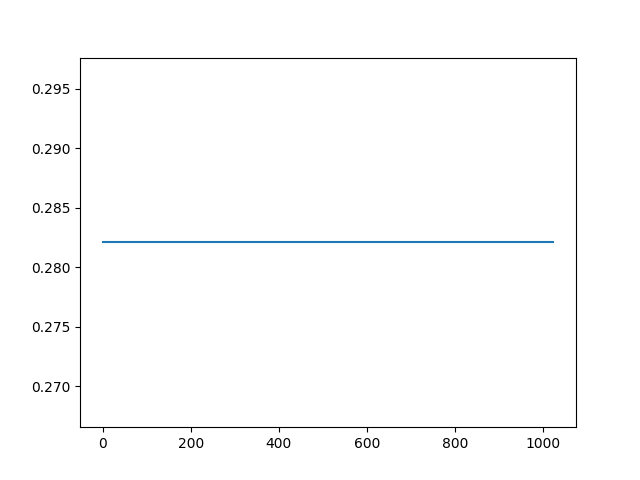

In [6]:
plt.figure()
plt.plot(avg_beam[:, 0].real)
plt.show()

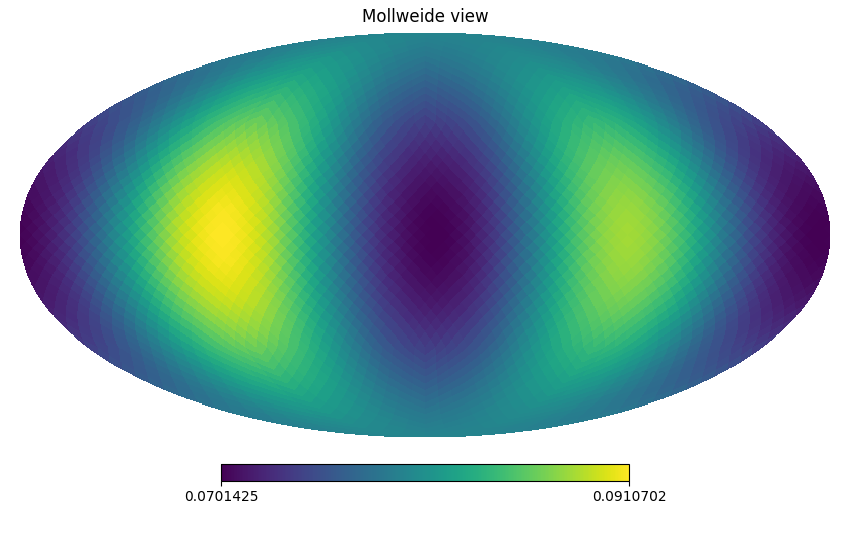

In [8]:
hp.mollview(hp.alm2map(avg_beam[0], nside=16))